Link of the colab page:

[link text](https://)https://colab.research.google.com/drive/1WqRr_CvsqC3h8fLomNxIYWJlWkAk5RPA?usp=sharing

# **PART 1**

In [ ]:
!pip install py3Dmol
!pip install rdkit-pypi
import py3Dmol
import time
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol
def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

In [ ]:
def smi2conf(smiles):
    '''Convert SMILES to rdkit.Mol with 3D coordinates'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
        return mol
    else:
        return None


In [ ]:
import numpy as np
print("NOTE:- THIS PRGOGRAM IS ONLY FOR THE RESONANCE STABILISED MOLECULES CONTAINIG ANY HETEROATOM !!!!\n")

find=input('''Enter the code of one of the molecule whose hucekel energy , bond order , pi electron density, number of nodes, 
transition energy and degeneracy of states is to be found: 
    1) PHENANTHRENE(pht)
    2) BENZENE(ben)
    3) NAPHTHALENE(nap)
    4) CYCLOPROPENE(cyp)
    5) CYCLO BUTADIENE(cybtd)
    6) ANTHRACENE(anth)
    7) BUTADIENE(butd)
    8) Any other structure(*you have to know its huckel matrix)(AOS) \n ''')

if find == "pht":
  a=float(input("Enter the coulomb integral(alpha) value:"))
  b=float(input("Enter the Resonance integral(beta) value:"))
  pht=np.array([[a,b,0,0,0,0,0,0,0,0,0,0,0,b],[b,a,b,0,0,0,0,0,0,0,0,0,0,0],[0,b,a,b,0,0,0,0,0,0,0,0,0,0],[0,0,b,a,b,0,0,0,0,0,0,0,0,0],
               [0,0,0,b,a,b,0,0,0,0,0,0,0,b],[0,0,0,0,b,a,b,0,0,0,0,0,0,0],[0,0,0,0,0,b,a,b,0,0,0,0,0,0],[0,0,0,0,0,0,b,a,b,0,0,0,b,0],
               [0,0,0,0,0,0,0,b,a,b,0,0,0,0],[0,0,0,0,0,0,0,0,b,a,b,0,0,0],[0,0,0,0,0,0,0,0,0,b,a,b,0,0],[0,0,0,0,0,0,0,0,0,0,b,a,b,0],
               [0,0,0,0,0,0,0,b,0,0,0,b,a,b],[b,0,0,0,b,0,0,0,0,0,0,0,b,a]])                         # PHENANTRAENE
  smi='c1ccc3c(c1)ccc2ccccc23'
  x=pht
  n=[2,2,2,2,2,2,2,0,0,0,0,0,0,0]
elif find == "ben":
  a=float(input("Enter the coulomb integral(alpha) value:"))
  b=float(input("Enter the Resonance integral(beta) value:"))
  ben= np.array([[a,b,0,0,0,b],[b,a,b,0,0,0],[0,b,a,b,0,0],[0,0,b,a,b,0],[0,0,0,b,a,b],[b,0,0,0,b,a]])         #  BENZENE    
  smi='c1ccccc1'
  x=ben
  n=[2,2,2,0,0,0]
elif find == "nap":
  a=float(input("Enter the coulomb integral(alpha) value:"))
  b=float(input("Enter the Resonance integral(beta) value:"))
  nap=np.array([[a,b,0,0,0,0,0,0,0,b],[b,a,b,0,0,0,0,0,0,0],[0,b,a,b,0,0,0,0,0,0],[0,0,b,a,b,0,0,0,0,0],[0,0,0,b,a,b,0,0,0,b],
            [0,0,0,0,b,a,b,0,0,0],[0,0,0,0,0,b,a,b,0,0],[0,0,0,0,0,0,b,a,b,0],[0,0,0,0,0,0,0,b,a,b],[b,0,0,0,b,0,0,0,b,a]])   # NAPHTHALENE
  smi='c1cc2ccccc2cc1'
  x=nap
  n=[2,2,2,2,2,0,0,0,0,0]
elif find=="cyp":
  a=float(input("Enter the coulomb integral(alpha) value:"))
  b=float(input("Enter the Resonance integral(beta) value:"))
  cyp=np.array([[a,b,b],[b,a,b],[b,b,a]])                                                                    # CYCLOPROPENE
  x=cyp
  ion=input("Cation \Anion \Radical ?\n")
  if ion=='Cation':
    n=[2,0,0]
    smi='c1c[cH+]1'
  if ion=='Anion':
    n=[2,2,0]
    smi='c1c[cH-]1'
  if ion=='Radical':
    n=[2,1,0] 
    smi='c1c[cH+]1'                         
elif find=="cybtd":
  a=float(input("Enter the coulomb integral(alpha) value:"))
  b=float(input("Enter the Resonance integral(beta) value:"))
  cybtd= np.array([[a,b,0,b],[b,a,b,0],[0,b,a,b],[b,0,b,a]])                                                 # CYCLO BUTADIENE        
  x=cybtd
  n=[2,1,1,0]
elif find == "anth":
  a=float(input("Enter the coulomb integral(alpha) value:"))
  b=float(input("Enter the Resonance integral(beta) value:"))
  anth= np.array([[a,b,0,0,0,0,0,0,0,0,0,0,0,b],[b,a,b,0,0,0,0,0,0,0,0,0,0,0],[0,b,a,b,0,0,0,0,0,0,0,0,0,0],[0,0,b,a,b,0,0,0,0,0,0,0,0,0],
                  [0,0,0,b,a,b,0,0,0,0,0,0,0,b],[0,0,0,0,b,a,b,0,0,0,0,0,0,0],[0,0,0,0,0,b,a,b,0,0,0,b,0,0],[0,0,0,0,0,0,b,a,b,0,0,0,0,0],
                  [0,0,0,0,0,0,0,b,a,b,0,0,0,0],[0,0,0,0,0,0,0,0,b,a,b,0,0,0],[0,0,0,0,0,0,0,0,0,b,a,b,0,0],[0,0,0,0,0,0,b,0,0,0,b,a,b,0],
                  [0,0,0,0,0,0,0,0,0,0,0,b,a,b],[b,0,0,0,b,0,0,0,0,0,0,0,b,a]]) # ANTHRACENE
  smi='c3ccc2cc1ccccc1cc2c3'
  x=anth
  n=[2,2,2,2,2,2,2,0,0,0,0,0,0,0]
elif find== "butd":
  a=float(input("Enter the coulomb integral(alpha) value:"))
  b=float(input("Enter the Resonance integral(beta) value:"))
  butd=np.array([[a,b,0,0],[b,a,b,0],[0,b,a,b],[0,0,b,a]])     # BUTADIENE
  x=butd
  n=[2,2,0,0]
  smi='C=CC=C'
elif find== "AOS":
  m=int(input("Enter the no of atoms constituting the structure:"))
  u=np.zeros((m,m))
  for i in range(m):
    for j in range(m):
      print("Enter the",i ,',',j , "value:")
      u[i,j]=float(input())
  x=u
  smi=input("Enter its smiles notation:")
  n=np.zeros((m))
  
  


print("The Huckel Matrix is=\n",x) 
e_value,e_vector=np.linalg.eig(x)
idx= e_value.argsort()
e_value= e_value[idx]
e_vector=e_vector[:,idx]
print("EIGEN VALUE= \n", e_value,"\n\nEIGEN VECTOR=\n",e_vector)



#### Locating electrons in energy levels
if find== "AOS":
  n_tot=int(input("\n\nEnter total no of elctrons in the molecule="))

  for z in range(len(x)-1):
    if round(e_value[z],2)==round(e_value[z+1],2):
        if n_tot == 3:
          n[z]=2
          n[z+1]=1
          n_tot= n_tot-3
        elif n_tot > 2:
          n[z]=2
          n[z+1]=2
          n_tot=n_tot-4
        elif n_tot == 2:
          n[z]=1
          n[z+1]=1
          n_tot= n_tot-2
        
        elif n_tot == 1:
          n[z]=1
          n[z+1]=0
          n_tot=n_tot-1
    else :
      if n_tot >= 2:
        n[z]=2
        n_tot=n_tot-2
      elif n_tot == 1:
        n[z]=1
        n_tot= n_tot-1
      
  print("\n\nNo. of electrons in differnt energy levels=",n)


conf = smi2conf(smi)
viewer = MolTo3DView(conf, size=(600, 300), style='stick')
# style can be 'line', 'stick', 'sphere', 'carton'
viewer.show()

##### calculating huckel energy 

energy=0
for i in range(len(x)):
  energy+=n[i]*e_value[i]
  
print("\n\nHUCKEL ENERGY in kcal/mol : ",energy)
print("\n\n")
##### Calculating bond order
print("If bond order is negative then assume it is zero")
j=0
k=1
bo=0
for j in range(len(x)):
  for k in range(len(x)):
    bo=0
    for i in range(len(x)):
      bo+=(n[i]*e_vector[j,i]*e_vector[k,i])
    print("BOND ORDER (only for pi) BETWEEN ",j+1,"& ",k+1," ATOM = ", bo)

print("\n\n")
##### Population of pi electron
for j in range(len(x)):
  p=0
  for i in range(len(x)):
    p+=n[i]*((e_vector[j,i])**2)
  print("POPULATON OF pi ELECTRON AT ",j+1," ATOM= ",p)

###### NUMBER OF NODES
print('\n\nNUMBER OF NODES IS GIVEN BY---\n') 
for j in range(len(x)):
        p=[]    
        for i in range(len(x)-1):
            if (e_vector[i,j]*e_vector[i+1,j]) < 0 :
                p.append(i)
        print("NUMBER OF NODES IN ",j+1,"th molecular orbitai is ",len(p))
print("  ( NOTE that 1st Orbital is of lowest energy and second is more higher in energy and so on)")


###### Transition energy
t=0
for i in range(len(x)):
  if n[i]==2 or n[i]==1 :
    t=i
trans= e_value[t+1]-e_value[t]
print("\n\nMINIMUM ENERGY REQUIRED FOR TRANSITION OF ELECTRON TO TAKE PLACE or HOMO-LUMO gap is = ",trans )

###### DEGENERACY OF A STATE 
print( "\n\nKNOWING DEGENERACY OF MOLECULAR ORBITALS --\n")
p=0
for z in range(len(x)-1):
    if round(e_value[z],2)==round(e_value[z+1],2):
        print('Molecular orbitals ',z+1,'and ',z+2,' are degenerate')
        p=p+1
if p == 0:
  print("NO DEGENRATE LEVELS")



NOTE:- THIS PRGOGRAM IS ONLY FOR THE RESONANCE STABILISED MOLECULES CONTAINIG ANY HETEROATOM !!!!

Enter the code of one of the molecule whose hucekel energy , bond order , pi electron density, number of nodes, 
transition energy and degeneracy of states is to be found: 
    1) PHENANTHRENE(pht)
    2) BENZENE(ben)
    3) NAPHTHALENE(nap)
    4) CYCLOPROPENE(cyp)
    5) CYCLO BUTADIENE(cybtd)
    6) ANTHRACENE(anth)
    7) BUTADIENE(butd)
    8) Any other structure(*you have to know its huckel matrix)(AOS) 
 AOS
Enter the no of atoms constituting the structure:5
Enter the 0 , 0 value:
-1.5
Enter the 0 , 1 value:
-1
Enter the 0 , 2 value:
0
Enter the 0 , 3 value:
0
Enter the 0 , 4 value:
-1
Enter the 1 , 0 value:
-1
Enter the 1 , 1 value:
0
Enter the 1 , 2 value:
-1
Enter the 1 , 3 value:
0
Enter the 1 , 4 value:
0
Enter the 2 , 0 value:
0
Enter the 2 , 1 value:
-1
Enter the 2 , 2 value:
0
Enter the 2 , 3 value:
-1
Enter the 2 , 4 value:
0
Enter the 3 , 0 value:
0
Enter the 3 , 1 value:

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol



HUCKEL ENERGY in kcal/mol :  -8.629704776697341



If bond order is negative then assume it is zero
BOND ORDER (only for pi) BETWEEN  1 &  1  ATOM =  1.6289368361044487
BOND ORDER (only for pi) BETWEEN  1 &  2  ATOM =  0.5003449839034297
BOND ORDER (only for pi) BETWEEN  1 &  3  ATOM =  -0.22775891898702758
BOND ORDER (only for pi) BETWEEN  1 &  4  ATOM =  -0.22775891898702752
BOND ORDER (only for pi) BETWEEN  1 &  5  ATOM =  0.50034498390343
BOND ORDER (only for pi) BETWEEN  2 &  1  ATOM =  0.5003449839034297
BOND ORDER (only for pi) BETWEEN  2 &  2  ATOM =  1.0489370183811166
BOND ORDER (only for pi) BETWEEN  2 &  3  ATOM =  0.75432581719843
BOND ORDER (only for pi) BETWEEN  2 &  4  ATOM =  -0.14010137380148596
BOND ORDER (only for pi) BETWEEN  2 &  5  ATOM =  -0.39827657711884085
BOND ORDER (only for pi) BETWEEN  3 &  1  ATOM =  -0.22775891898702758
BOND ORDER (only for pi) BETWEEN  3 &  2  ATOM =  0.75432581719843
BOND ORDER (only for pi) BETWEEN  3 &  3  ATOM =  1.13659456356665

# **PART 2**

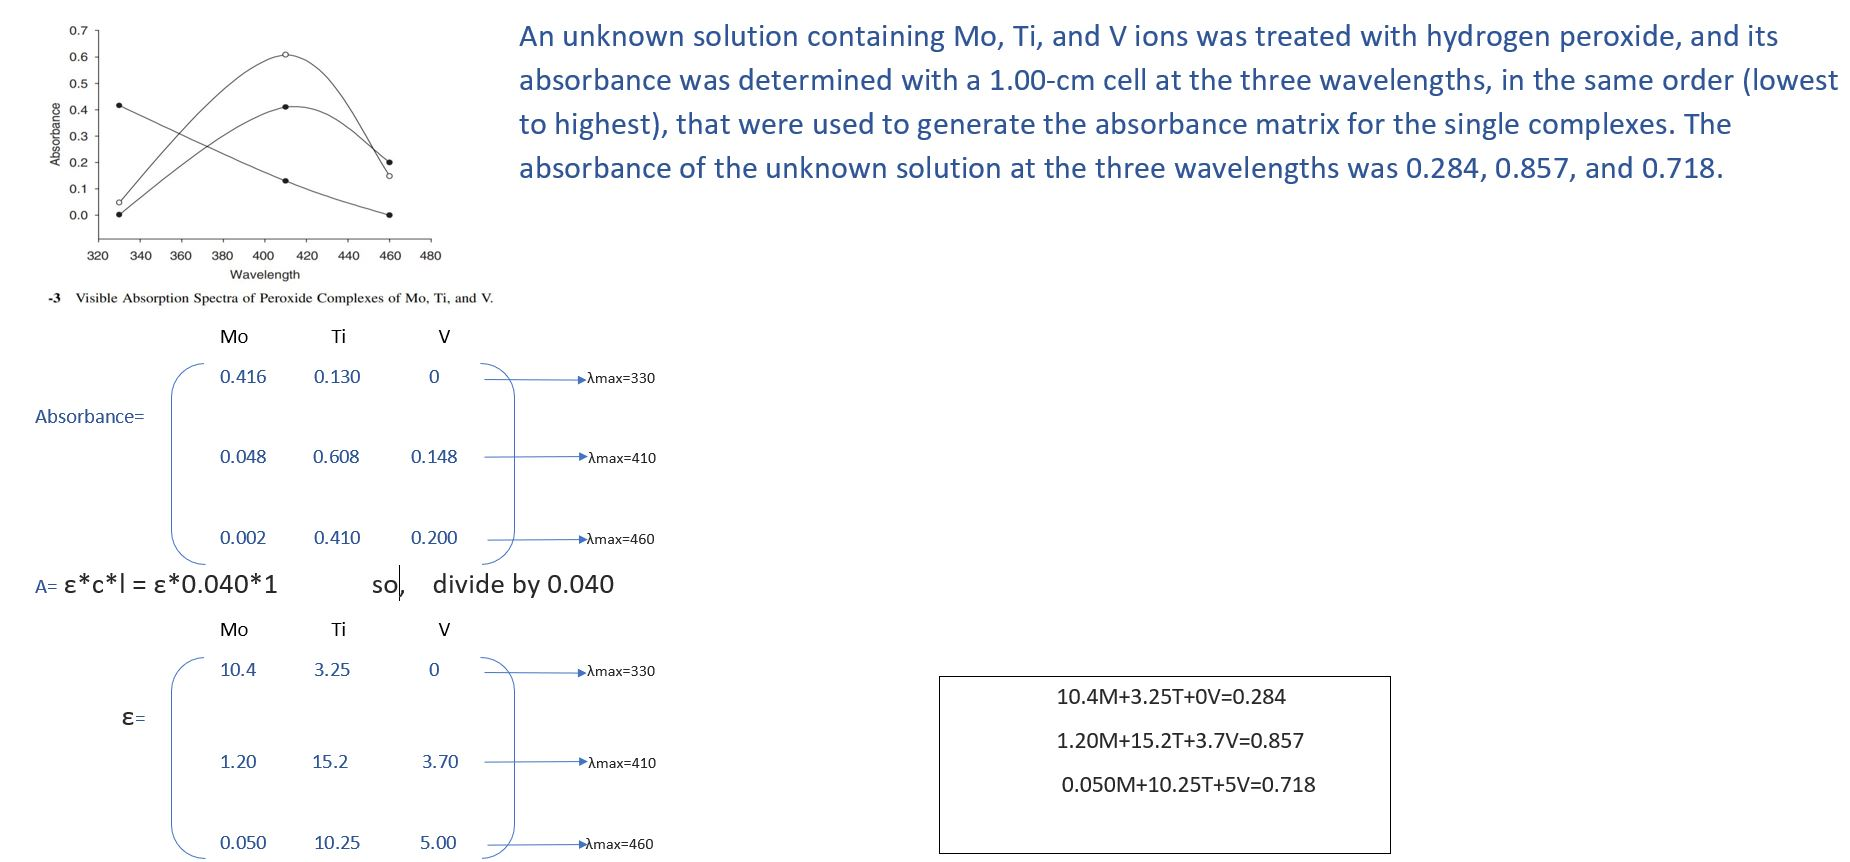

In [ ]:
  #vierodt's method of analysis
#no need of seperation of multiple components present in the sample 
#criteria two absorbing species(x and y),each of which should have some absorbance at λmax of other
  import numpy as np
  N=int(input("Enter the no. absorbing species is "))
  c=float(input("Enter the concentration of individual species in g/L"))#same metal complex concentration for all three
  l=int(input("Enter cell length in cm")) 

  Absorbance_Matrix=np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      print("Enter the absorbance of species at",(i+1)," λmax value:")
      Absorbance_Matrix[i,j]=float(input())

print("Absorbance_Matrix=\n",Absorbance_Matrix)
E_matrix=Absorbance_Matrix/(c*l)   #in L g^-1 cm^-1
print("E_matrix=\n",E_matrix)
A_unknown=np.zeros((N,1))

for i in range(N):
    print("Enter the absorbance of unknown solution at",(i+1)," λmax value:")
    A_unknown[i,0]=float(input())

print("A_unknown=\n",A_unknown)
C=np.linalg.solve(E_matrix,A_unknown)
print(C)
print("Concentration of 1,2 &3 species in g/L of the unknown are ",C[0],C[1],C[2],"respectively")

Enter the no. absorbing species is 3
Enter the concentration of individual species in g/L0.040
Enter cell length in cm1
Enter the absorbance of species at 1  λmax value:
0.416
Enter the absorbance of species at 1  λmax value:
0.130
Enter the absorbance of species at 1  λmax value:
0
Enter the absorbance of species at 2  λmax value:
0.048
Enter the absorbance of species at 2  λmax value:
0.608
Enter the absorbance of species at 2  λmax value:
0.148
Enter the absorbance of species at 3  λmax value:
0.002
Enter the absorbance of species at 3  λmax value:
0.410
Enter the absorbance of species at 3  λmax value:
0.200
Absorbance_Matrix=
 [[0.416 0.13  0.   ]
 [0.048 0.608 0.148]
 [0.002 0.41  0.2  ]]
E_matrix=
 [[10.4   3.25  0.  ]
 [ 1.2  15.2   3.7 ]
 [ 0.05 10.25  5.  ]]
Enter the absorbance of unknown solution at 1  λmax value:
0.284
Enter the absorbance of unknown solution at 2  λmax value:
0.857
Enter the absorbance of unknown solution at 3  λmax value:
0.718
A_unknown=
 [[0.284]
 [0.8